****DATA ANALYSIS OF THE TITANIC DATA****

**Importing basic libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Reading the data**

In [2]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
titanic_data=pd.concat([train_data,test_data])
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.shape

(891, 12)

**Data Exploration**

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.shape

(418, 11)

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#seperating numerical and categorical data

num_data=train_data[['Age','SibSp','Parch','Fare']]
cat_data=train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

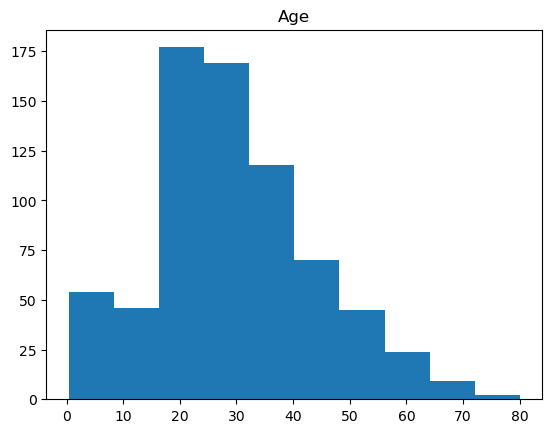

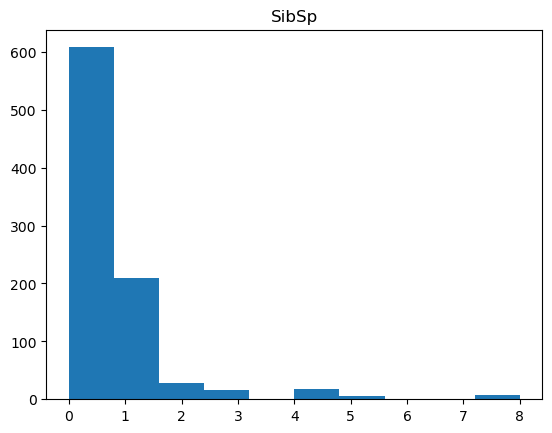

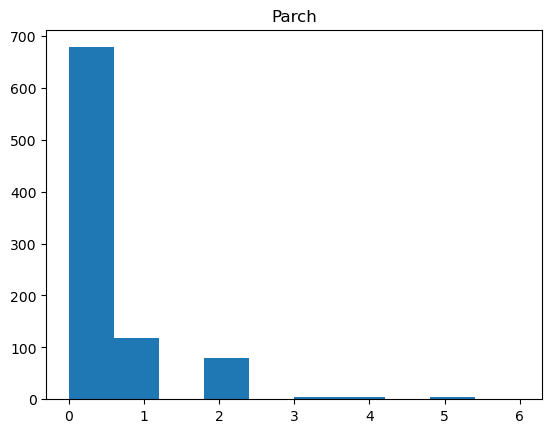

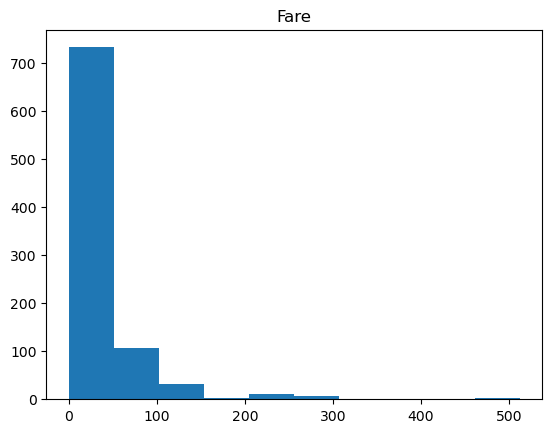

In [10]:
#plots of the numeric data

for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

 Except Age, seems like, all other columns require Normalization...

**Let's visualize correlation among the numerical columns of the data**

<Axes: >

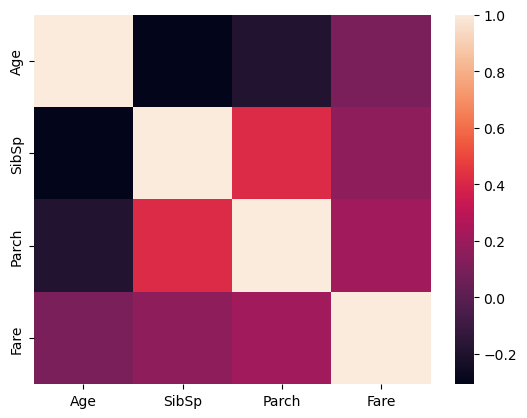

In [11]:
sns.heatmap(num_data.corr())

So, we see 'Parch' and 'SibSp' have a higher correlation and its obvious as Parents are more likely to travel with their children and spouses also travel together.

**Now, let's check survival rates across numerical columns**

In [12]:
pd.pivot_table(train_data,index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


* The average age of survivors is 28. This implies that young people tend to survive more.

* Also, the people who paid almost double fare rates survived. The harsh truth is rich survived.

* It is obvious that, if you have parents along you're more likely to survive as Parents tend to protect their children first.

* And if you have more siblings, there are comparitively less chances of you surviving as it is difficult to pay attention to all of them.

**Now, let's analyze the categorical data**

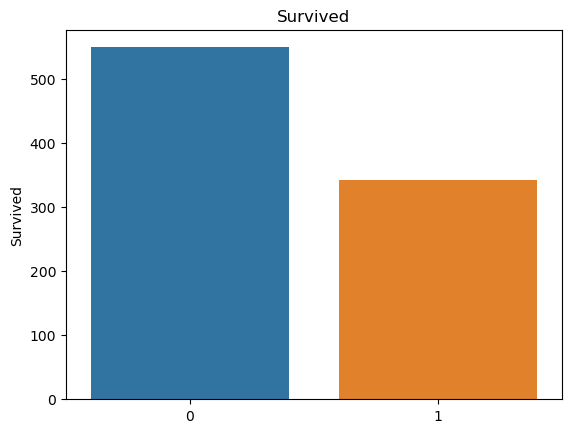

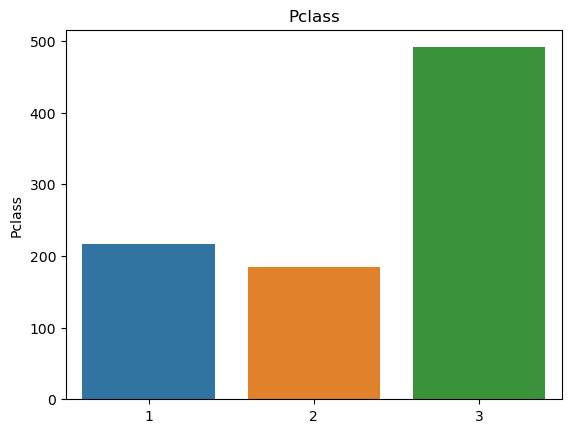

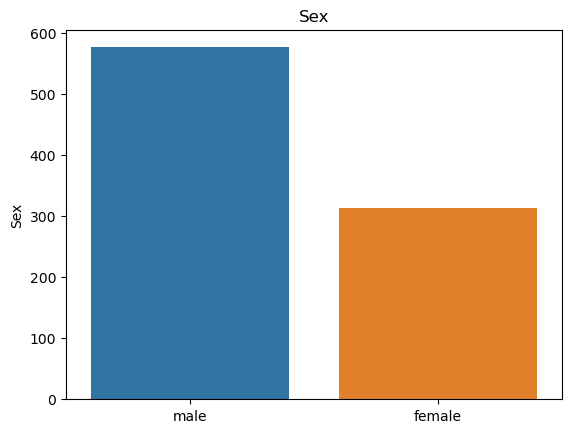

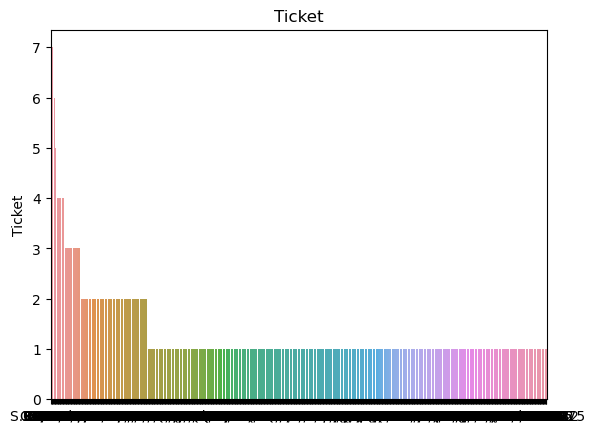

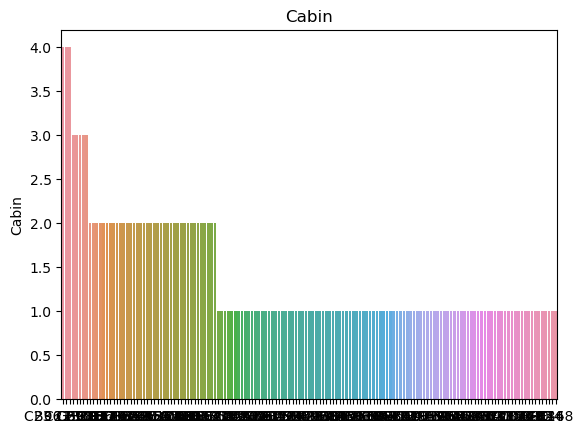

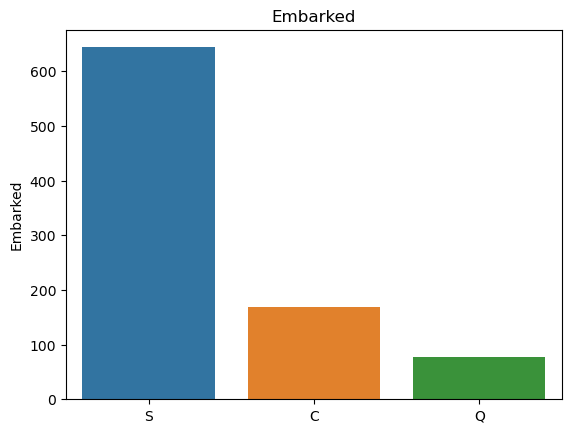

In [13]:
for i in cat_data.columns:
    val_count=cat_data[i].value_counts()
    sns.barplot(x=val_count.index,y=val_count).set_title(i)
    plt.show()

The 'Ticket' and 'Cabin' plots aren't making things clear so, we'll look into them later.

Inference from the above plots:

* Survived- Most people died in this massacre, and only around 300 people survived.

* Pclass- Most people travelling, had tickets of the 3rd class. 

* Sex- Males were almost double of that of females.

* Embarked- Seems like, most people boarded from Southampton.

**Let's first look for survival rates across each categorical column.**

In [14]:
pd.pivot_table(train_data,index='Survived',columns='Pclass',values='Ticket',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Here, we see a lot of people from First class survived than the Second or Third class. Although, people in First class were lesser than the other two class.

Thus, our assumption most rich people survived is assured and this might be relevant enough in our model building.

In [15]:
pd.pivot_table(train_data,index='Survived',columns='Sex',values='Ticket',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


Also here, male number was larger than females but still, females survived more. Lol! Karma would have been the feature.

In [16]:
pd.pivot_table(train_data,index='Survived',columns='Embarked',values='Ticket',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


People from 'Cherbourg' had a higher chance of survival. However, this doesn't seem so relevant.

'Ticket' and 'Cabin' columns we previously ignored mayhinder the performance of the model. So, let's first simplify them with feature engineering.

'Cabin' column is a letter followed by a number. 
First let's see if a single person owned more than one cabins.

In [17]:
cat_data.Cabin
train_data['multiple_cabins']=train_data.Cabin.apply(lambda x:0 if pd.isna(x)
                                                     else len(x.split(' ')))
train_data['multiple_cabins'].value_counts()

cat_data.Cabin
test_data['multiple_cabins']=train_data.Cabin.apply(lambda x:0 if pd.isna(x)
                                                     else len(x.split(' ')))
test_data['multiple_cabins'].value_counts()

0    326
1     80
2      8
3      3
4      1
Name: multiple_cabins, dtype: int64

It seems like most people didn't have individual cabins, only a few owned multiple cabins.

Now, let's see if the survival rates depend on this...

In [18]:
pd.pivot_table(train_data,index='Survived',columns='multiple_cabins',values='Ticket',aggfunc='count')

multiple_cabins,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


Now, let's look into the letter of the cabin. This would be helpful assuming that the cabins with the same letter would roughly fall in the same location and maybe that had any influence on chances of survival.

In [19]:
#null values are considered to be a seperate category

train_data['cabin_letter']=train_data.Cabin.apply(lambda x:str(x)[0])

print(train_data.cabin_letter.value_counts())
pd.pivot_table(train_data,index='Survived',columns='cabin_letter',values='Name',aggfunc='count')

test_data['cabin_letter']=test_data.Cabin.apply(lambda x:str(x)[0])

print(test_data.cabin_letter.value_counts())
pd.pivot_table(test_data,columns='cabin_letter',values='Name',aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64
n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: cabin_letter, dtype: int64


cabin_letter,A,B,C,D,E,F,G,n
Name,7,18,35,13,9,8,1,327


When it comes to tickets column we see few are numberic and few alphanumeric/non-numeric.
So, let's simply divide the ticket column into numeric and non-numeric for better understanding.

In [20]:
train_data['num_ticket']=train_data.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
train_data['nonum_ticket']=train_data.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

test_data['num_ticket']=train_data.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
test_data['nonum_ticket']=train_data.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

We can also look into the passenger's title and if it had influenced in getting a seat in the ship.

In [21]:
train_data.Name.head(50)
train_data['title']=train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

train_data['title'].value_counts()

test_data.Name.head(50)
test_data['title']=train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

test_data['title'].value_counts()

Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
Don         1
Mme         1
Name: title, dtype: int64

Woah, the ship was boarded by people of many different classes. So, let's consider this...

**Voila! It's time for Data Pre-Processing...**

Firstly, let's drop the null values from the 'Embarked' column

In [22]:
train_data.dropna(subset=['Embarked'], inplace=True)
test_data.dropna(subset=['Embarked'], inplace=True)

In [23]:
train_data.shape

(889, 17)

In [24]:
test_data.shape

(418, 16)

**Now, let's transform all of the categorical columns**

In [25]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()

for i in cat_data:
    if i in train_data.columns:
        train_data[i]=le1.fit_transform(train_data[i])

le2=LabelEncoder()

for i in cat_data:
    if i in test_data.columns:
        test_data[i]=le2.fit_transform(test_data[i])

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,multiple_cabins,cabin_letter,num_ticket,nonum_ticket,title
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,522,7.2500,146,2,0,n,0,a5,Mr
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,595,71.2833,80,0,1,C,0,pc,Mrs
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,668,7.9250,146,2,0,n,0,stono2,Miss
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,48,53.1000,54,2,1,C,1,0,Mrs
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,471,8.0500,146,2,0,n,1,0,Mr


Now, let's impute data with the central tendencies for 'Age' and 'Fare'.

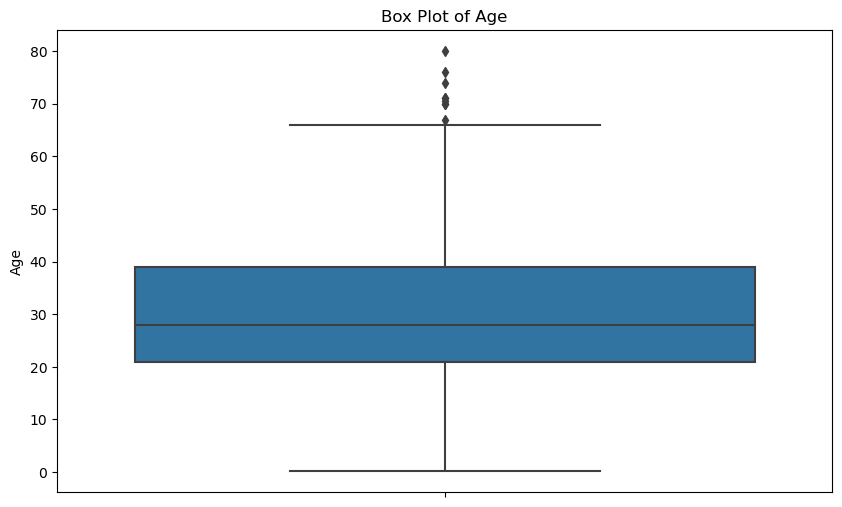

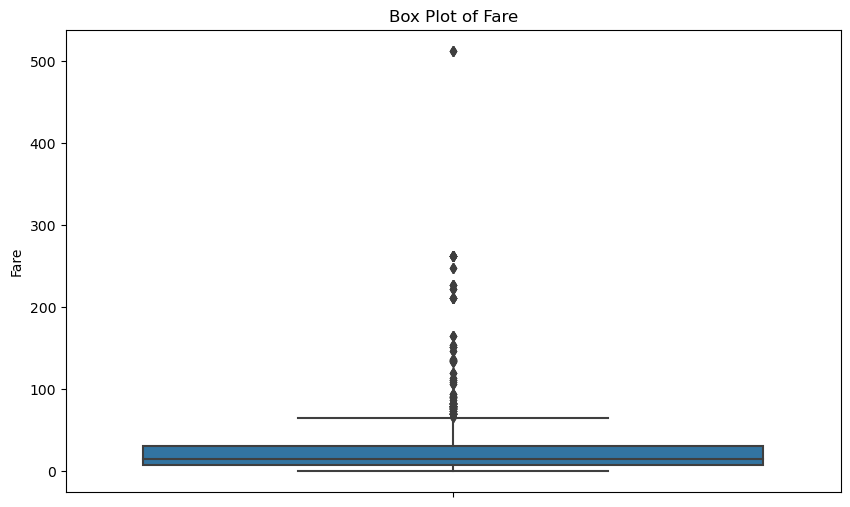

In [27]:
#boxplot to check for outliers in the age column
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_data, y='Age')
plt.title('Box Plot of Age')
plt.show()

#boxplot to check for outliers in the fare column
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_data, y='Fare')
plt.title('Box Plot of Fare')
plt.show()

We can see outliers mostly in the 'Fare' column.

Generally, median is replaced for column with more outliers.
So, for 'Age' it's better to replace with the mean and for 'Fare' column with the median.

So, let's go!!!

In [28]:
#calculating central tendencies
mean_age=train_data['Age'].mean()
median_fare=train_data['Fare'].median()

#imputing missing values with the calculated central tendencies
train_data['Age'].fillna(mean_age,inplace=True)
train_data['Fare'].fillna(median_fare,inplace=True)

mean_age=test_data['Age'].mean()
median_fare=test_data['Fare'].median()

#imputing missing values with the calculated central tendencies
test_data['Age'].fillna(mean_age,inplace=True)
test_data['Fare'].fillna(median_fare,inplace=True)

The 'Fare' column still requires normalization and we gonna do it using MinMaxScaler module from Scikit-Learn library

An important point to note, we generally use MinMaxScaler when there are too many outliers. So, it is the better option for the 'Fare' column

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

train_data['Fare']=scaler.fit_transform(train_data['Fare'].values.reshape(-1,1))
test_data['Fare']=scaler.fit_transform(test_data['Fare'].values.reshape(-1,1))

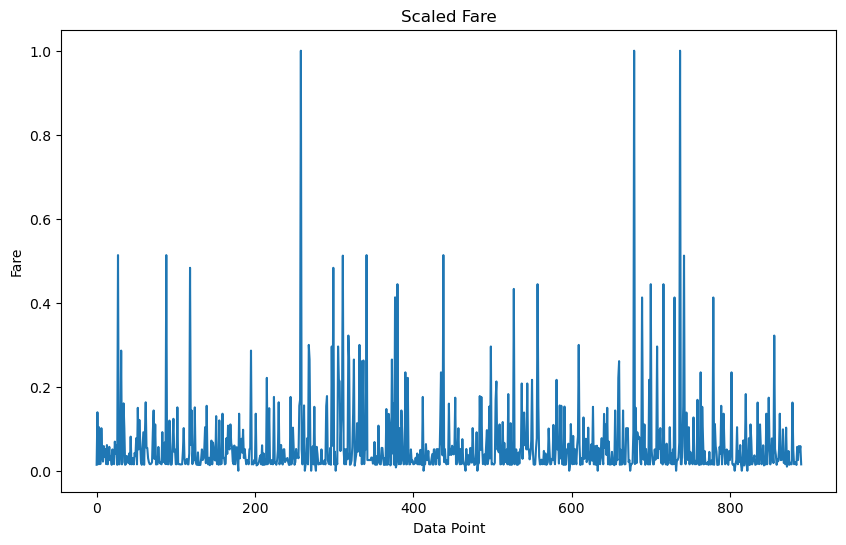

In [30]:
# Create a line plot to visualize the normalization
plt.figure(figsize=(10, 6))

plt.plot(train_data['Fare'], label='Scaled Fare')
plt.xlabel('Data Point')
plt.ylabel('Fare')
plt.title('Scaled Fare')

plt.show()

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,multiple_cabins,cabin_letter,num_ticket,nonum_ticket,title
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,522,0.014151,146,2,0,n,0,a5,Mr
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,595,0.139136,80,0,1,C,0,pc,Mrs
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,668,0.015469,146,2,0,n,0,stono2,Miss
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,48,0.103644,54,2,1,C,1,0,Mrs
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,471,0.015713,146,2,0,n,1,0,Mr


So you see here, the 'Fare' column is finally scaled.

Also, let's scale the other columns using StandardScaler. It scales data between 0 and 1.

In [32]:
from sklearn.preprocessing import StandardScaler

colmns_to_scale=['Age','SibSp','Parch']

scale1=StandardScaler()
train_data[colmns_to_scale]=scale1.fit_transform(train_data[colmns_to_scale])
scale2=StandardScaler()
test_data[colmns_to_scale]=scale2.fit_transform(test_data[colmns_to_scale])


In [33]:
from sklearn.preprocessing import LabelEncoder
col_enc=['cabin_letter','title']
le3=LabelEncoder()
for i in col_enc:
    if i in train_data.columns:
        train_data[i]=le3.fit_transform(train_data[i])

le4=LabelEncoder()
for i in col_enc:
    if i in test_data.columns:
        test_data[i]=le4.fit_transform(test_data[i])

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,multiple_cabins,cabin_letter,num_ticket,nonum_ticket,title
0,1,0,2,"Braund, Mr. Owen Harris",1,-0.589620,0.431350,-0.474326,522,0.014151,146,2,0,8,0,a5,11
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.644848,0.431350,-0.474326,595,0.139136,80,0,1,2,0,pc,12
2,3,1,2,"Heikkinen, Miss. Laina",0,-0.281003,-0.475199,-0.474326,668,0.015469,146,2,0,8,0,stono2,8
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.413385,0.431350,-0.474326,48,0.103644,54,2,1,2,1,0,12
4,5,0,2,"Allen, Mr. William Henry",1,0.413385,-0.475199,-0.474326,471,0.015713,146,2,0,8,1,0,11


I hope the data is processed and good to go!

MODEL DEPLOYMENT

Considering valid columns that contribute to the efficiency to our prediction model. And on such a data our model is trained

In [35]:
x_train=train_data.drop(columns=['Survived','Name','PassengerId','num_ticket','nonum_ticket'],axis=1)
x_test=test_data.drop(columns=['Name','PassengerId','num_ticket','nonum_ticket'],axis=1)

In [36]:
x_train.shape

(889, 12)

In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           889 non-null    int64  
 1   Sex              889 non-null    int64  
 2   Age              889 non-null    float64
 3   SibSp            889 non-null    float64
 4   Parch            889 non-null    float64
 5   Ticket           889 non-null    int64  
 6   Fare             889 non-null    float64
 7   Cabin            889 non-null    int64  
 8   Embarked         889 non-null    int64  
 9   multiple_cabins  889 non-null    int64  
 10  cabin_letter     889 non-null    int64  
 11  title            889 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 90.3 KB


In [38]:
x_test.shape

(418, 12)

In [39]:
y_train=train_data['Survived']
y_train.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

****Let's check with few of the known models****

**LOGISTIC REGRESSION**

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=5000)
cv = cross_val_score(log_reg, x_train, y_train, cv=5)
print(cv)
print(cv.mean())



[0.80898876 0.79213483 0.78089888 0.78089888 0.83050847]
0.7986859645781756


**RANDOM FOREST CLASSIFIER**

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
cv=cross_val_score(rfc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.81460674 0.86516854 0.80898876 0.86440678]
0.8358027042468101


**K-NEAREST NEIGHBOURS CLASSIFIER**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.64606742 0.59550562 0.69101124 0.75280899 0.70056497]
0.6771916460356758


**SUPPORT VECTOR CLASSIFIER**

In [43]:
from sklearn.svm import SVC

svc=SVC(probability=True,kernel='rbf')
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61797753 0.64044944 0.65730337 0.70786517 0.70056497]
0.664832095473878


**DECISION TREE CLASSIFIER**

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=5,random_state=0)
cv = cross_val_score(dtc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.80898876 0.82022472 0.79775281 0.85310734]
0.807700120611947


Of all the models, 'RANDOM FOREST CLASSIFIER' seems to be the best-fit with ~84% cross value score.

*  RANDOM FOREST CLASSIFIR - 84%
* 
* DECISION TREE CLASSIFIER - 81%
* 
*  LOGISTIC REGRESSION - 80%
* 
*  K-NEAREST NEIGHBOUR - 68%
* 
*  SUPPORT VECTOR MACHINE - 66%**

In [45]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [46]:
y_pred=rf.predict(x_test)
output_df=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':y_pred})

output_df.to_csv('submission.csv',index=False)